## Problem One: Obtaining a dataset

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")

## Problem Two: Investigating the dataset itself

The Ames Housing dataset is a dataset prepared by Dean De Cock, describing the sale of individual residential property in Ames, Iowa from 2006 to 2010.

It contains 2930 observations and 79 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) describing almost every aspect of residential homes in Ames, Iowa, with an additional target variable, SalePrice, which is to be predicted. These variables influence the process of assessing home values-- The 79 explanatory variables affect the state of the target variable, SalePrice.

It provides detailed information about the buildings, facilities in the buildings, location of the houses.

## Problem Three: Checking the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

By running df.info() in the cell above, We can confirm 64 variables of the float data type, 35 variables of the int data type and 43 variables of the string data type. SalePrice is the target variable in this dataset.


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Problem Four: Dealing with missing values

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

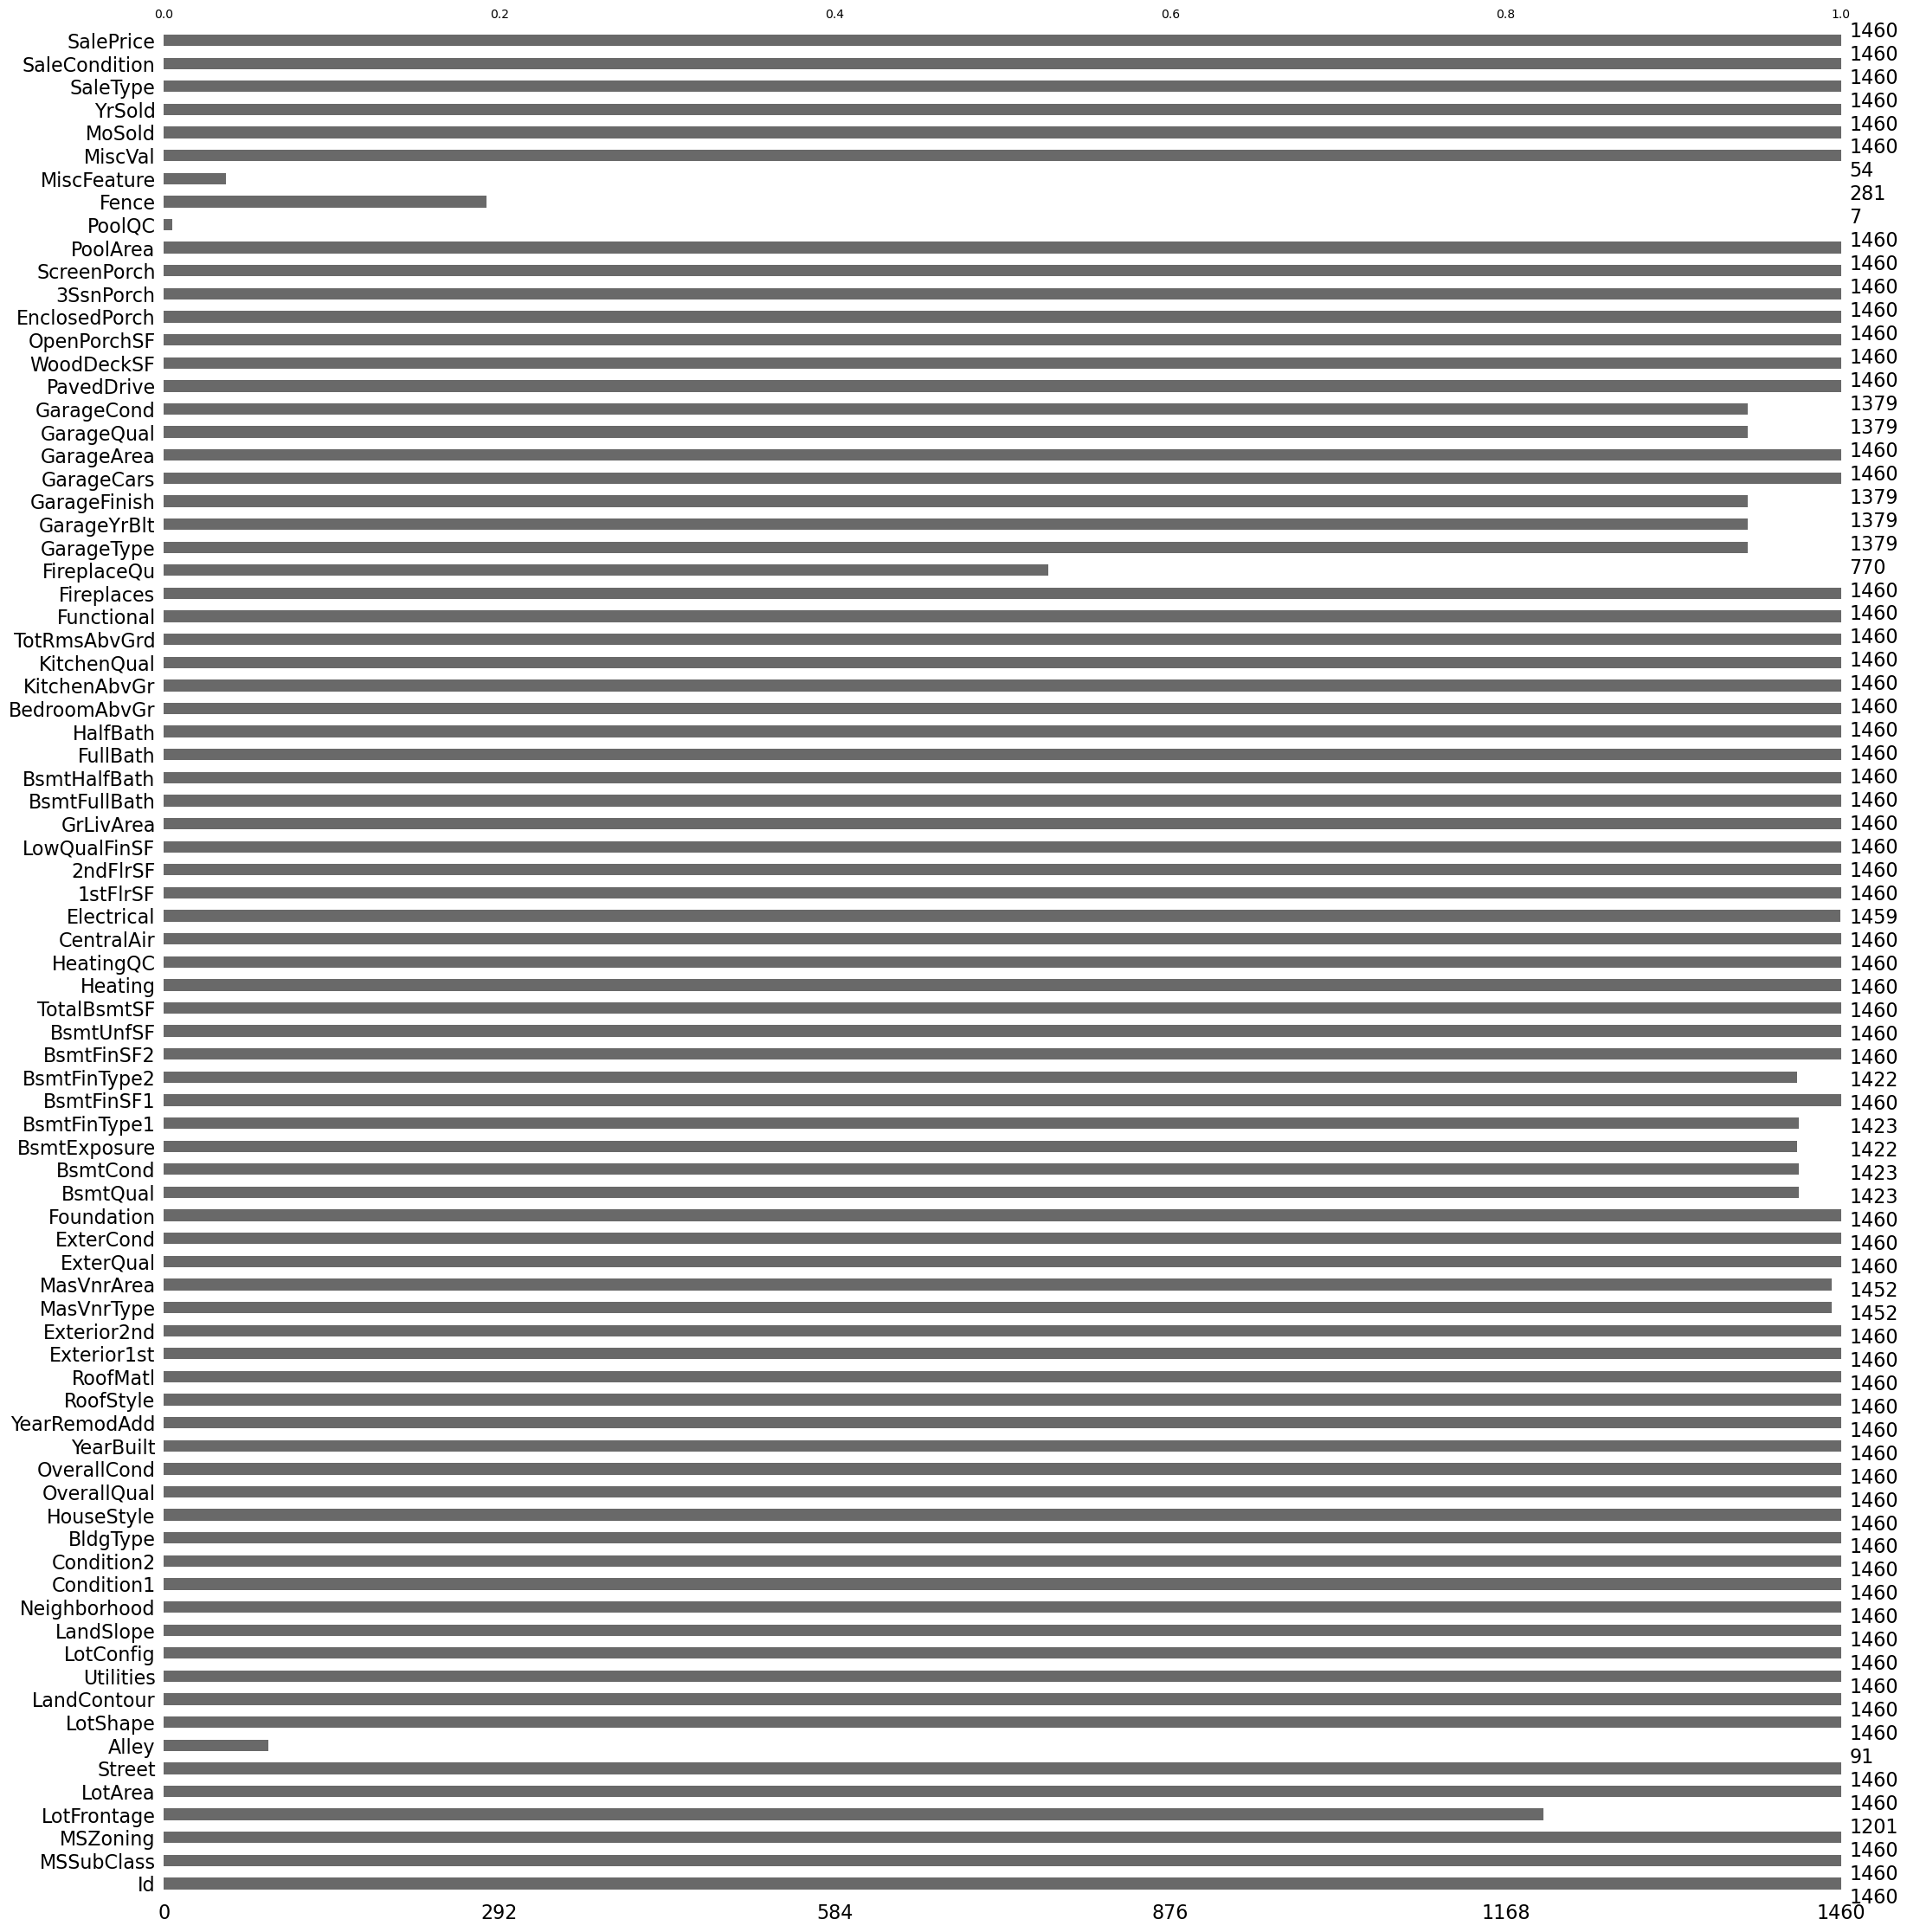

In [5]:
import missingno as msno
%matplotlib inline
msno.bar(df)

In [6]:
# getting the sample size of the dataset
n_samples = len(df)

# Getting the percentage of the missing values
missing_rates = df.isnull().sum() / n_samples * 100
missing_rates

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [7]:
# Showing the features with missing values greater than or equal to 5
n_missing = df.isnull().sum()
to_be_dropped = n_missing[n_missing >= 5]
to_be_dropped

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#dropping the features with missing values greater than or equal to 5
df_dropped_features = df.drop(to_be_dropped.index, axis=1)
display(df_dropped_features)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<AxesSubplot:>

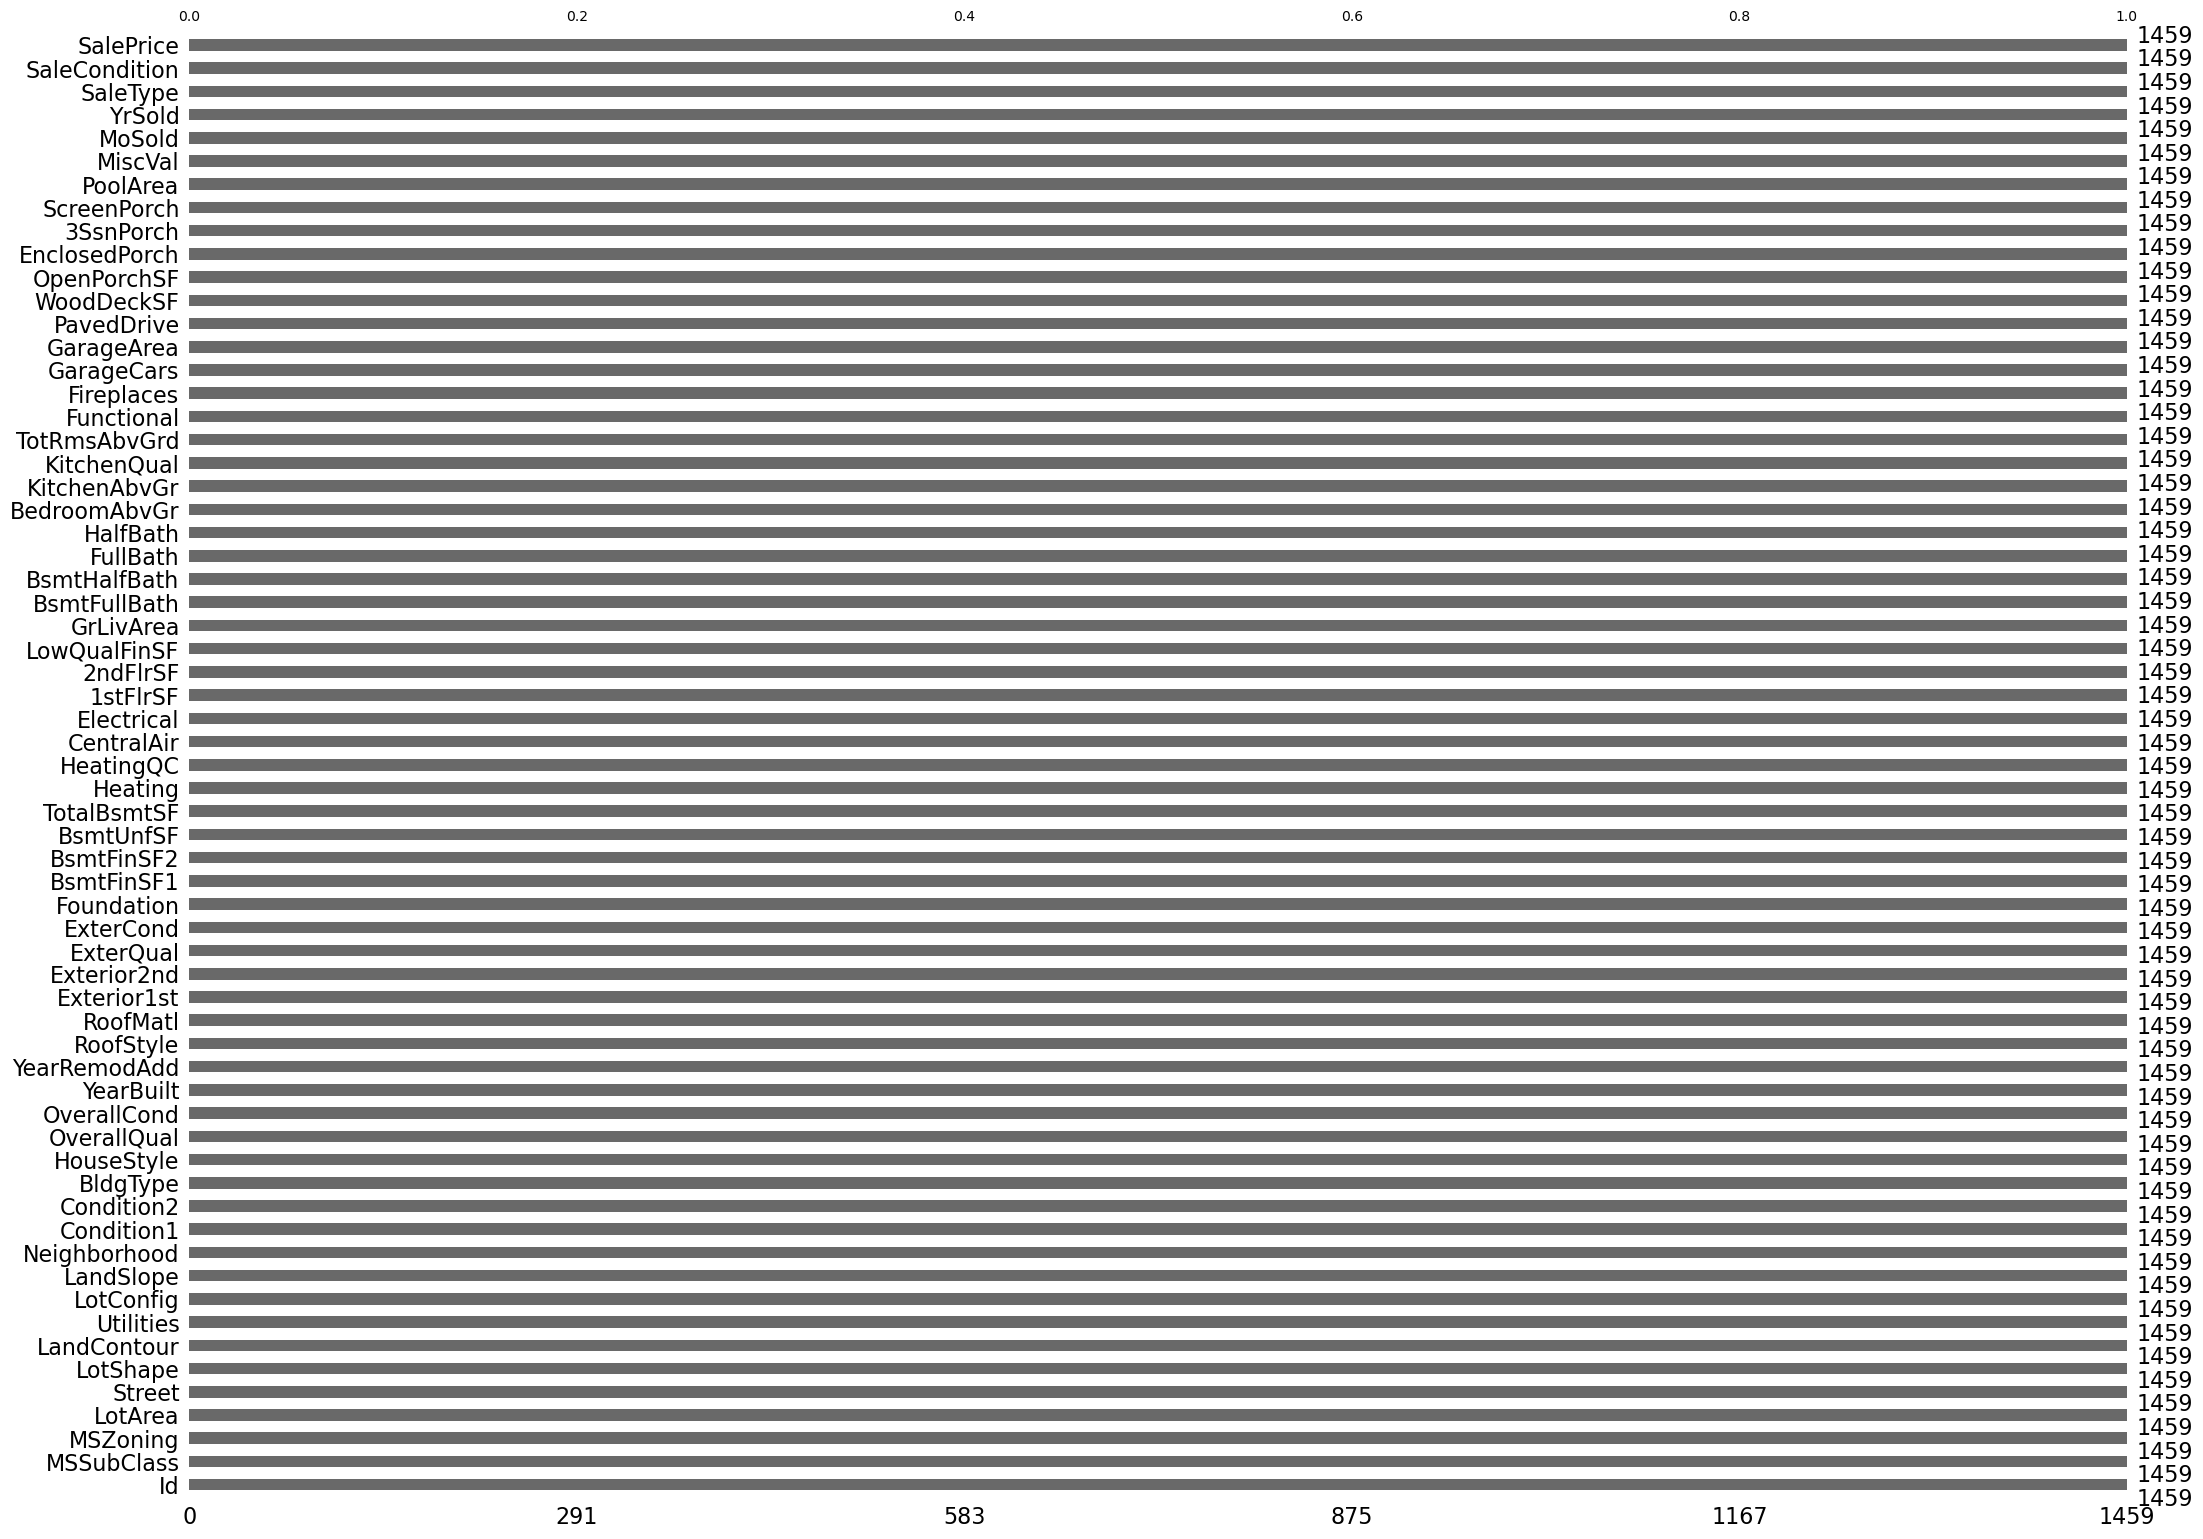

In [9]:
clean_df = df_dropped_features.dropna(axis=0).reset_index(drop=True)

# confirming that there are no missing data left in the dataset
msno.bar(clean_df)

## Problem Five: Researching terminology

#### **Kurtosis**
Kurtosis:
Kurtosis is a statistical measure that describes the "tailedness" or peakedness of a probability distribution. It quantifies the degree to which a distribution's tails deviate from the tails of a normal distribution. Kurtosis can be positive, negative, or zero.

Leptokurtic (Positive Kurtosis): The distribution has heavier tails and a sharper peak than the normal distribution. There are more extreme values than would be expected in a normal distribution.

Mesokurtic (Zero Kurtosis): The distribution has the same tail behavior as a normal distribution.

Platykurtic (Negative Kurtosis): The distribution has lighter tails and a flatter peak than the normal distribution. There are fewer extreme values than would be expected in a normal distribution.



#### **Skewness**
Skewness is a statistical measure that describes the asymmetry of a probability distribution. In simpler terms, it quantifies the degree and direction of skew (departure from horizontal symmetry) in a dataset. Skewness can be positive, negative, or zero.

Positive Skewness (Right Skew): The right tail of the distribution is longer or fatter than the left tail. The mass of the distribution is concentrated on the left, and there are some extreme values on the right.

Negative Skewness (Left Skew): The left tail is longer or fatter than the right tail. The mass of the distribution is concentrated on the right, and there are some extreme values on the left.

Zero Skewness: The distribution is perfectly symmetrical.

## Problem Six: Confirming distribution

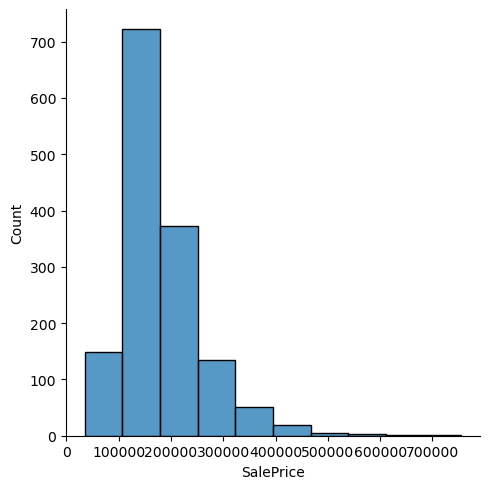

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

target = clean_df["SalePrice"]
sns.displot(target, kde=False, bins=10)
plt.show()

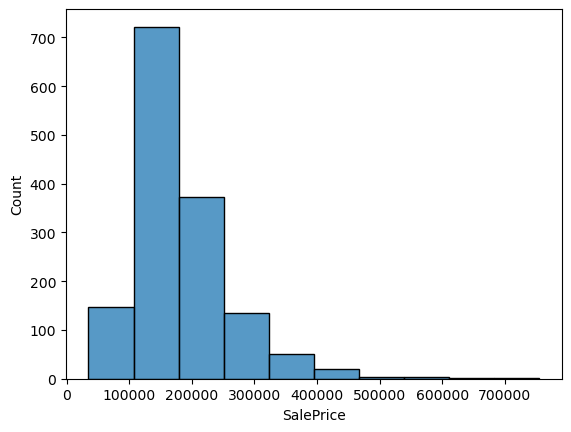

In [11]:
sns.histplot(target, kde=False, bins=10)
plt.show()

In [12]:
print(f"The skewness is: {target.skew() :,.2f}, and the kurtosis is {target.kurtosis() :,.2f}")

The skewness is: 1.88, and the kurtosis is 6.53


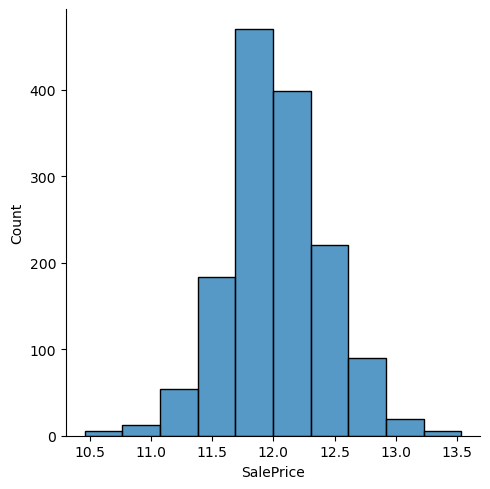

In [13]:
import numpy as np


target_log = np.log(target)
sns.displot(target_log, kde=False, bins=10)
plt.show()

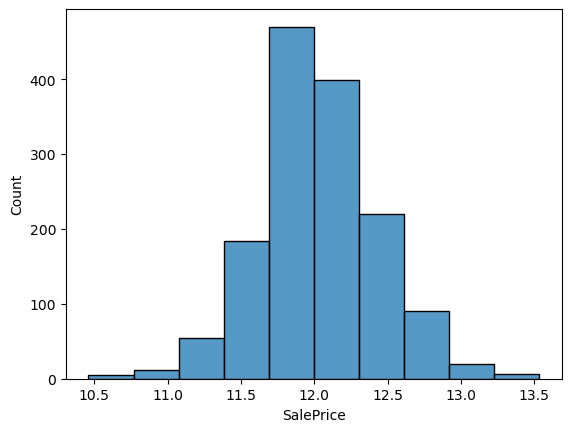

In [14]:
sns.histplot(target_log, kde=False, bins=10)
plt.show()

In [15]:
print(f"After applying log, skewness: {target_log.skew() :,.2f}, kurtosis: {target_log.kurtosis() :,.2f}")

After applying log, skewness: 0.12, kurtosis: 0.81


### Explaining
#### Normal Distribution
A normal distribution is a distribution symmetric around its mean, This means that the probabilities of observing values above the mean are the same as the probabilities of observing values below the mean. This causes a normal distribution to be characterized by a bell curve-- Most values cluster around a central region, with values tapering off as they go further away from the center. The measures of central tendency (mean, mode, and median) are exactly the same in a normal distribution.


#### Change Before and After Logarithmic Transformations
The distribution of SalePrice prior to the logarithmic transformation appears to be positively skewed, with there being huge differences between the number of observations as represented by the count label on the vertical axis. Some of the bars at the right tail are almost invisible. Although this is the actual representation of the distribution, the accuracy of our prospective model's prediction might be negatively affected if the model assumes that the data be a normal distribution-- This is why we performed logarithmic transformation on the data to scale the differences and express the data as a the percentage change of itself. This brings some symmetry into the distribution by stabilizing the variance and improves the model's accuracy if the model assumes normality of the distribution.

## Problem Seven: Confirming the correlation coefficient

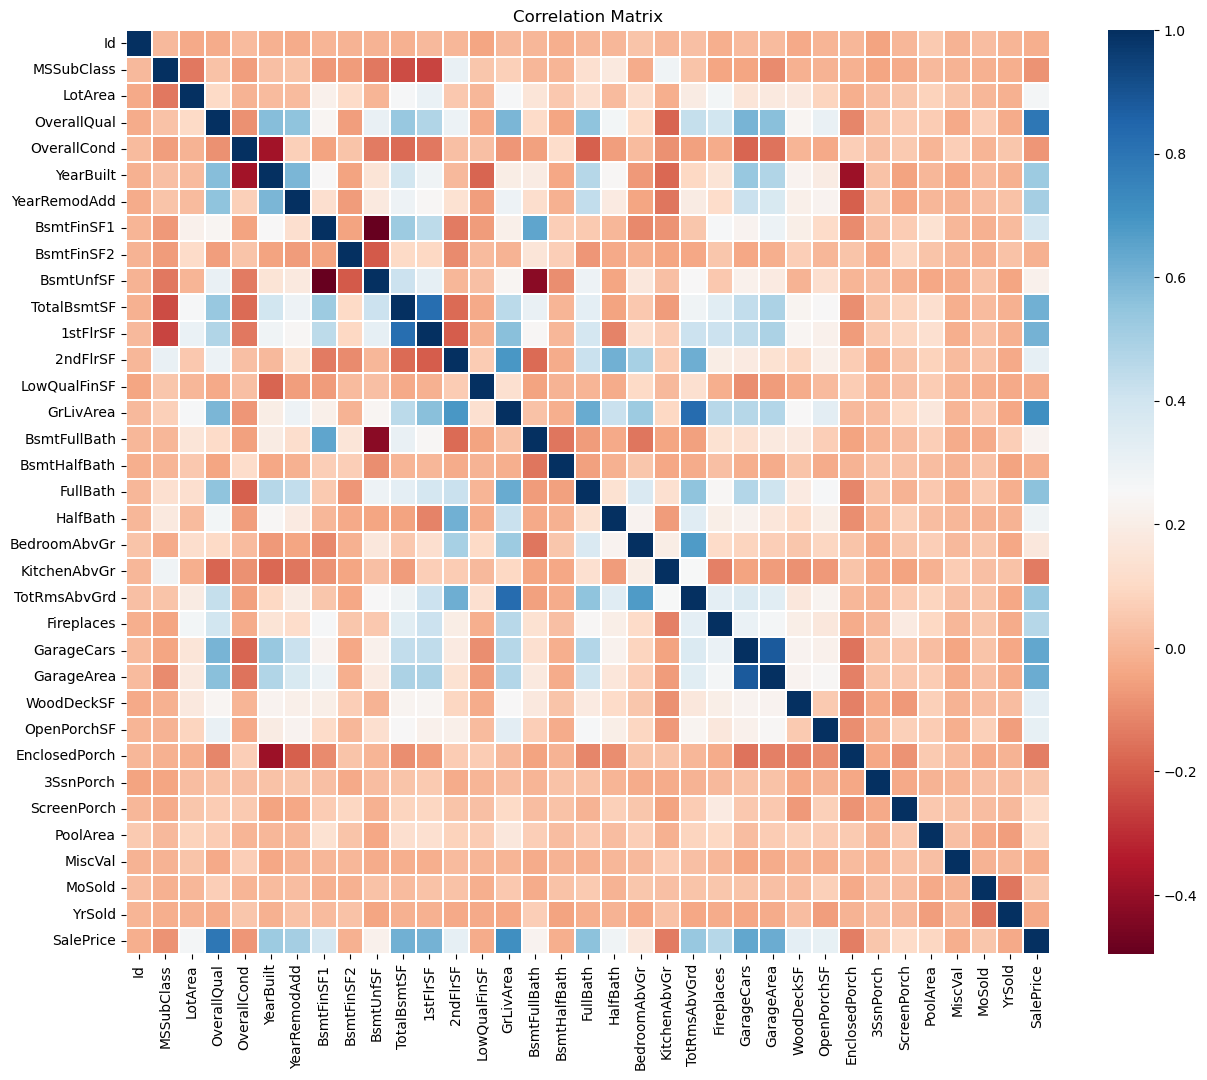

In [16]:
df_corr = clean_df.corr()

plt.subplots(figsize=(15,12))
plt.title("Correlation Matrix")
sns.heatmap(df_corr, vmax=1.0, square=True, cmap= plt.cm.RdBu, annot=False, linewidths=0.1)
plt.show()

In [19]:
top_10_corr_features = df_corr.SalePrice.sort_values(ascending=False)[1:11].index

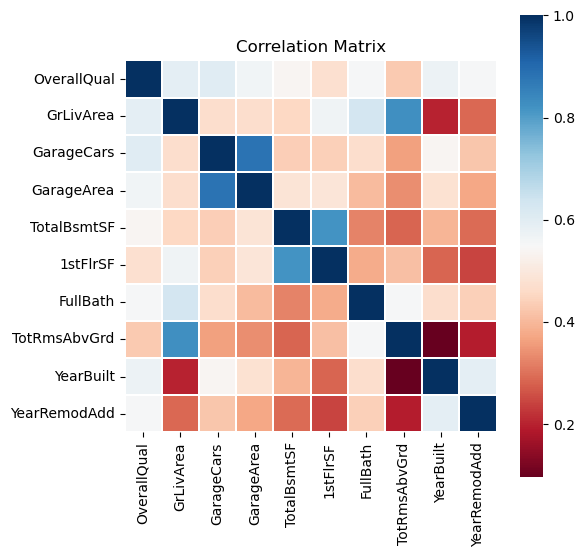

In [20]:
top_10_corr_values = clean_df[top_10_corr_features].corr()

plt.subplots(figsize=(6,6))
plt.title("Correlation Matrix")
sns.heatmap(top_10_corr_values, vmax=1.0, square=True, cmap= plt.cm.RdBu, annot=False, linewidths=0.1)
plt.show()

#### Making Sense of the Top 10 Features With the Highest Correlation Coefficients

The following are the top 10 features with the highest correlation coefficients with brief descriptions of what the variable represents:

OverallQual: Overall material and finish quality, Rates the overall material and finish of the house

GrLivArea: Above grade (ground) living area square feet

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

TotalBsmtSF: Total square feet of basement area

1stFlrSF: First Floor square feet

FullBath: Full bathrooms above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

#### **Summary**  
Looking at the variables above, we can infer that the price of a house is majorly affected by the its overall finish quality, the sizes of its: living area above ground; garage; basement area; and first floor, the total bathrooms above ground, the number of full bathrooms above ground, and how old the building is.

In [21]:
top_10_corr_values

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334,0.551605
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286,0.287677
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866,0.420573
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460,0.372012
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159,0.292546
1stFlrSF,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056,0.241344
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960,0.438733
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401,0.191603
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000,0.592512
YearRemodAdd,0.551605,0.287677,0.420573,0.372012,0.292546,0.241344,0.438733,0.191603,0.592512,1.000000


#### 3 Combinations of the 10 Selected Features With high Correlation Coefficients With Each Other

* We see that there is a high positive correlation between GarageCars and GarageArea-- this makes sense as a larger garage would contain more cars.
* Another high positive correlation we can spot is between GrLivArea and TotRmsAbvGrd-- houses with larger area above ground would most likely have more rooms built on the area.
* The third pair of features with relatively high positive correlation we shall consider is 1stFlrSF and TotalBsmtSF-- This relationship makes sense because the space allocated for the basement of a house would practically be relative to the total space allocated for the entire first floor of the building.